# Medical Insurance Price Prediction

In [1]:
#Importing necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading the dataset

data = pd.read_csv("C:/Users/dell/Downloads/ipynb datasets/Medical_insurance.csv")

In [4]:
#Data description

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [5]:
#Information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [6]:
#Statistical information of the data
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Shape of the dataset
data.shape

(2772, 7)

In [8]:
#Top 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
#Bottom 3 rows
data.tail(3)

,age,sex,bmi,children,smoker,region,charges
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [10]:
#no. of unique rows in each column
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [11]:
#Number of columns
data.nunique().count()

7

In [12]:
#No. of missing rows in each column
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
#percentage of missing values in each row
(data.isnull().sum()/(len(data)))*100  

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [14]:
#Data type of each column
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Converting Categorical Features to Numerical

In [15]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }

data.replace(clean_data, inplace=True)

In [16]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,0.492785,30.701349,1.101732,0.203463,1.530303,13261.369959
std,14.081459,0.500038,6.129449,1.214806,0.402647,1.105489,12151.768945
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4687.797000
50%,39.000000,0.000000,30.447500,1.000000,0.000000,2.000000,9333.014350
75%,51.000000,1.000000,34.770000,2.000000,0.000000,2.000000,16577.779500
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<Axes: >

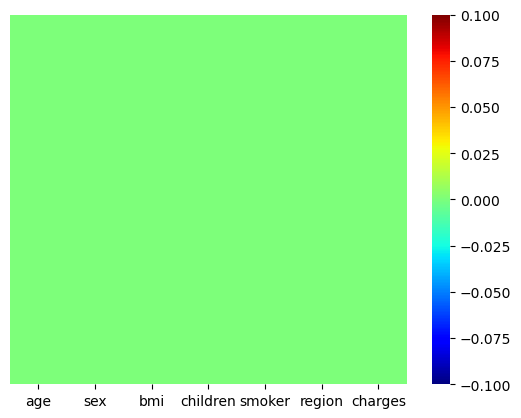

In [29]:
#Visualizing null values
sns.heatmap(data.isnull(), yticklabels=False, cmap='jet')

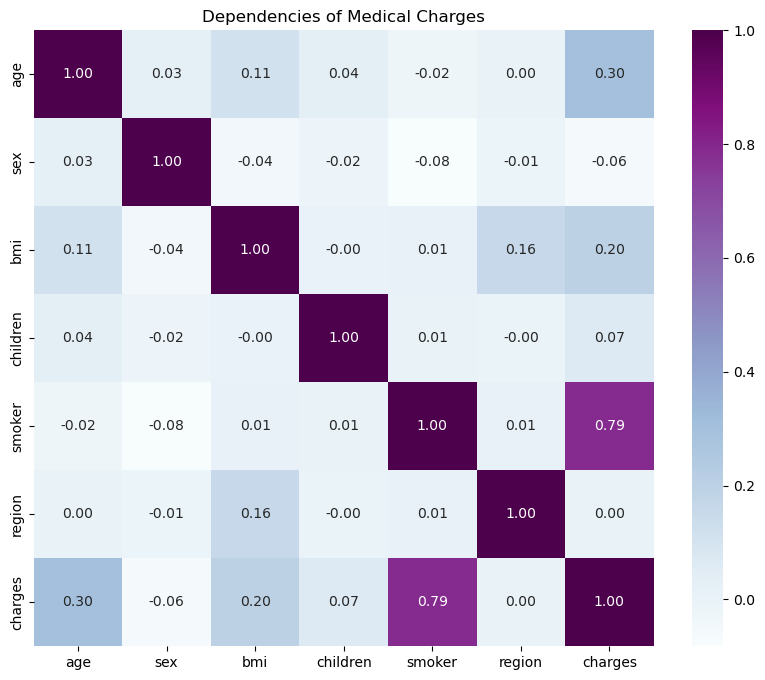

In [17]:
plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), cmap='BuPu', annot=True, fmt=".2f")
plt.title("Dependencies of Medical Charges")
plt.show()

Smoker, BMI and Age are most important factor that determnines - Charges

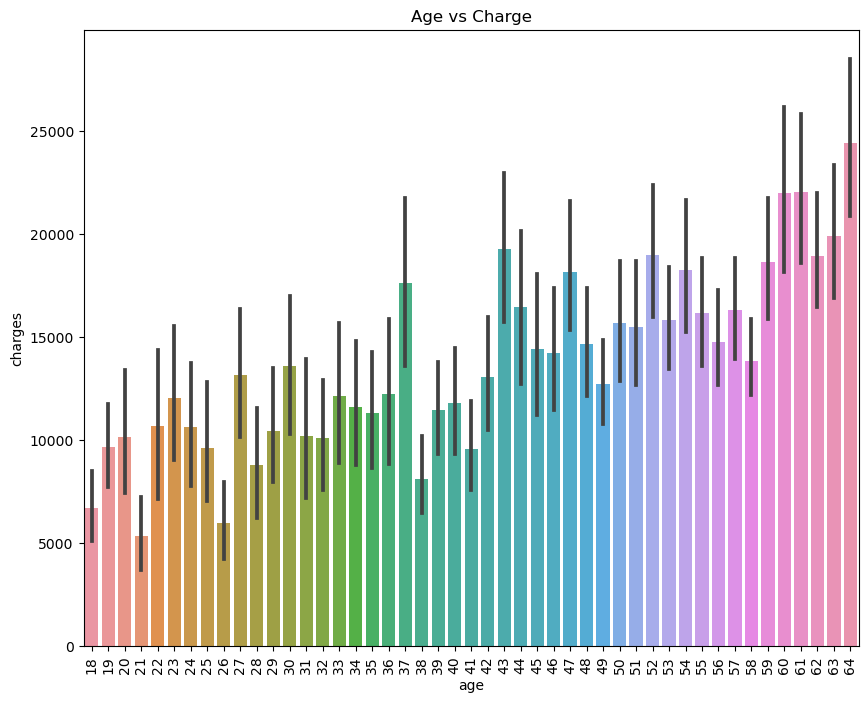

In [21]:
plt.figure(figsize=(10,8))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data)
plt.xticks(rotation=90)
plt.show()

<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

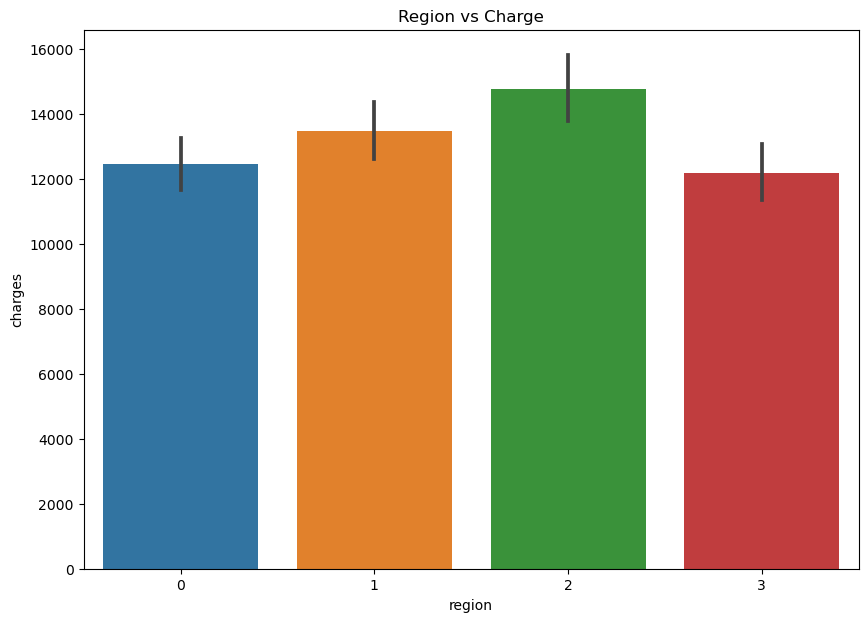

In [22]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data)

Text(0.5, 1.0, 'BMI VS Charge')

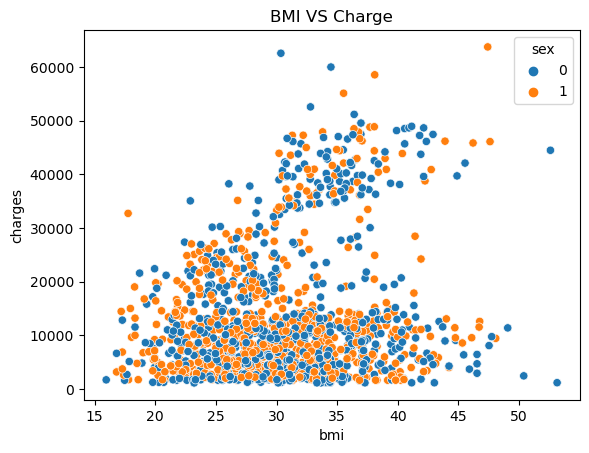

In [23]:
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data)
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

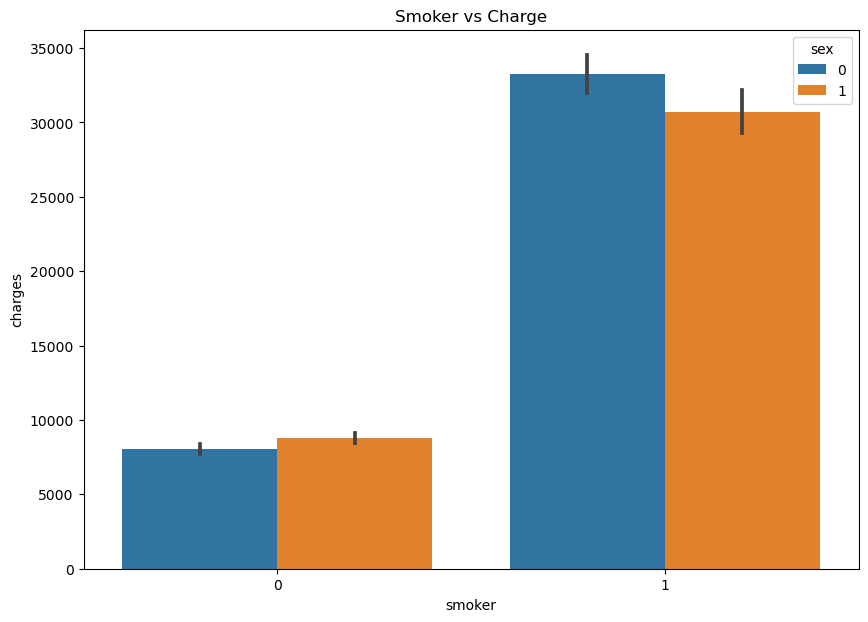

In [24]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data,hue='sex')

<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

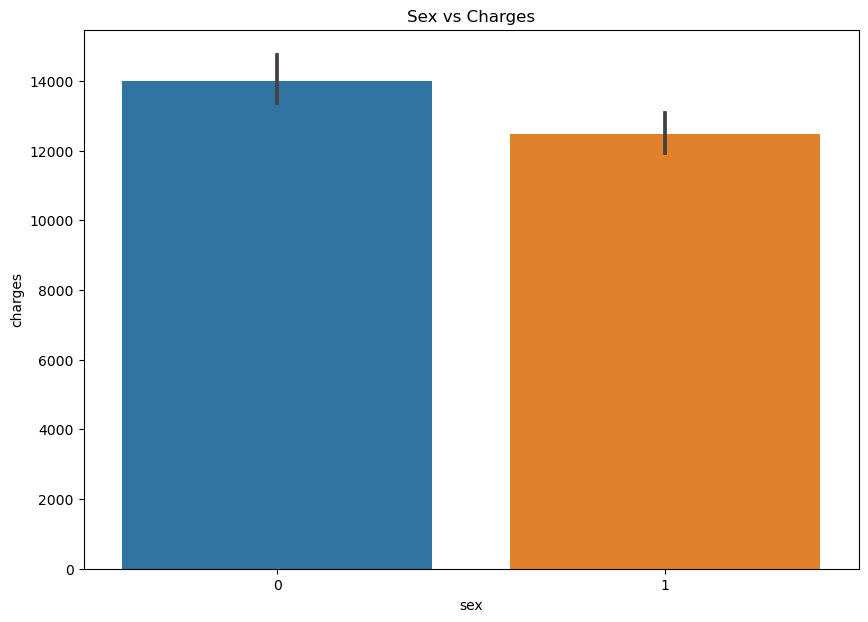

In [25]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data)

Text(0, 0.5, 'Count')

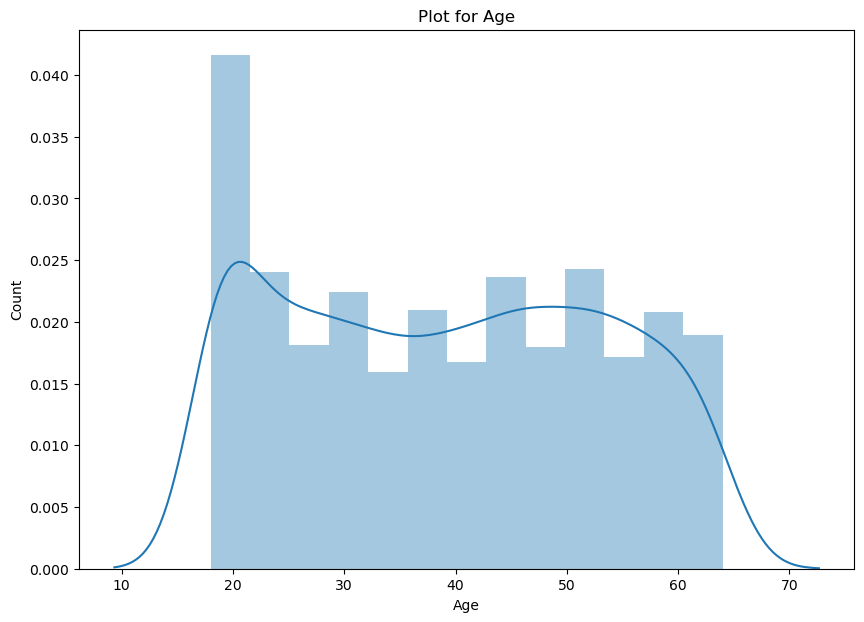

In [26]:
plt.figure(figsize=(10,7))
sns.distplot(data['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

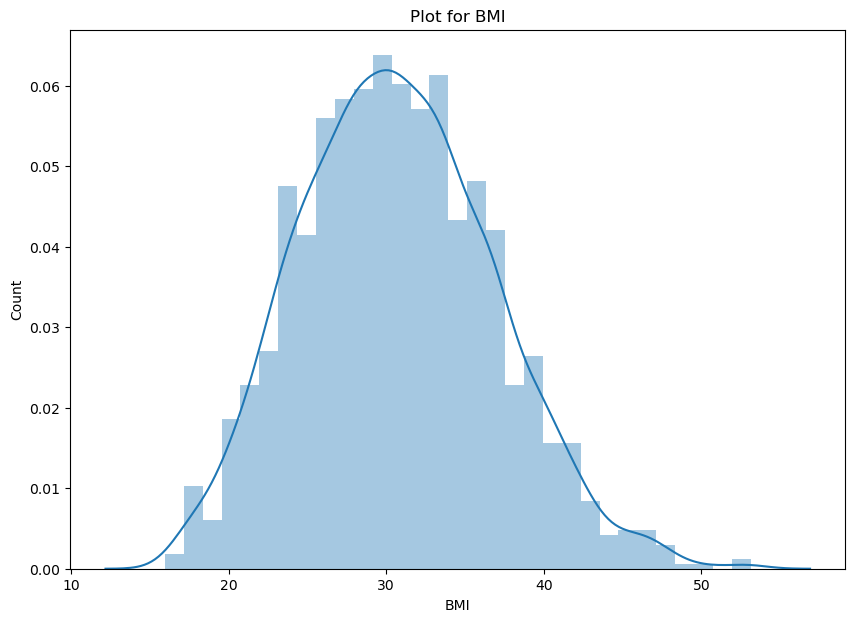

In [27]:
plt.figure(figsize=(10,7))
sns.distplot(data['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

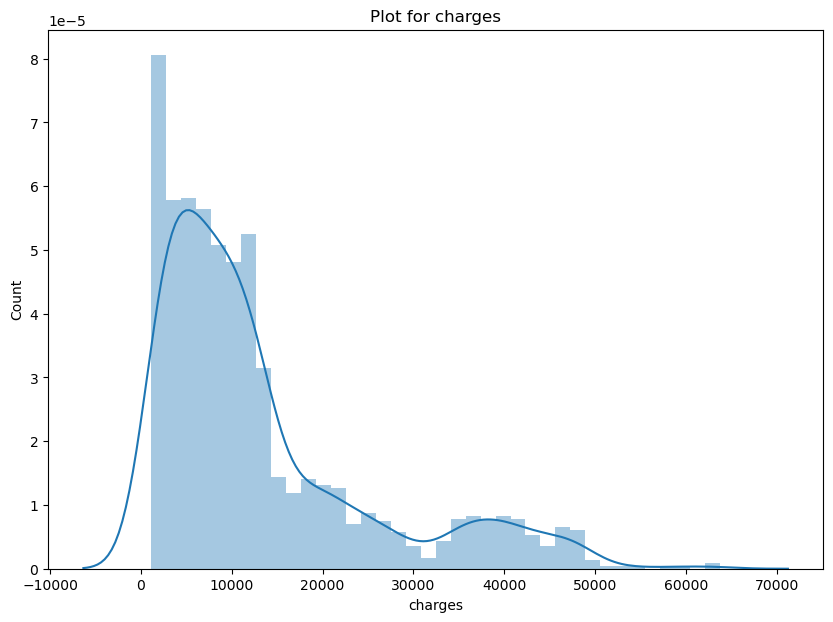

In [28]:
plt.figure(figsize=(10,7))
sns.distplot(data['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

In [31]:
a = data.groupby('region')['region'].count()

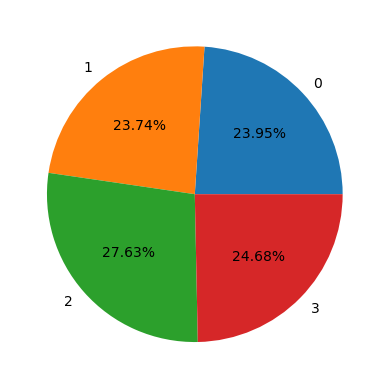

In [32]:
plt.pie(a, labels=a.index, autopct='%.2f%%')
plt.show()

In [33]:
b = data.groupby('children')['children'].count()

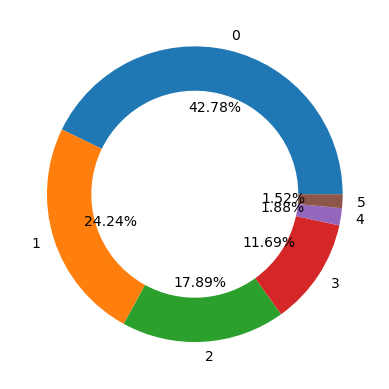

In [35]:
plt.pie(b, labels=b.index, autopct='%.2f%%', wedgeprops=dict(width=0.3))
plt.show()

<Axes: xlabel='charges'>

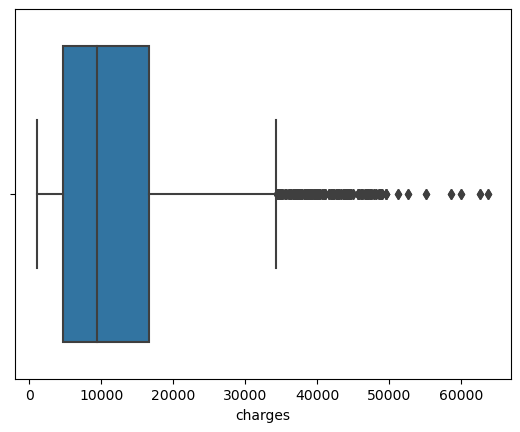

In [38]:
sns.boxplot(x='charges', data=data)

<Axes: xlabel='sex', ylabel='count'>

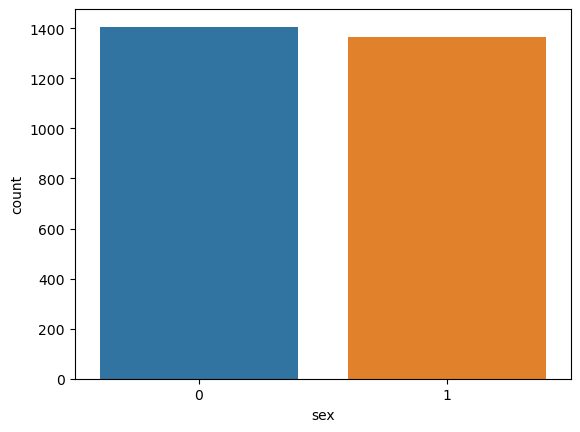

In [39]:
sns.countplot(x='sex', data=data)

<Axes: xlabel='smoker', ylabel='count'>

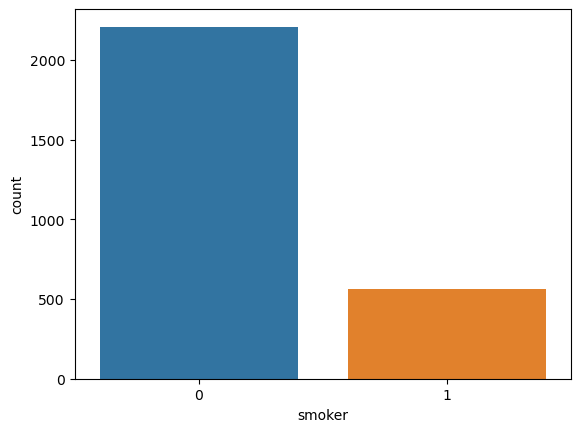

In [40]:
sns.countplot(x='smoker', data=data)

<Axes: xlabel='sex', ylabel='bmi'>

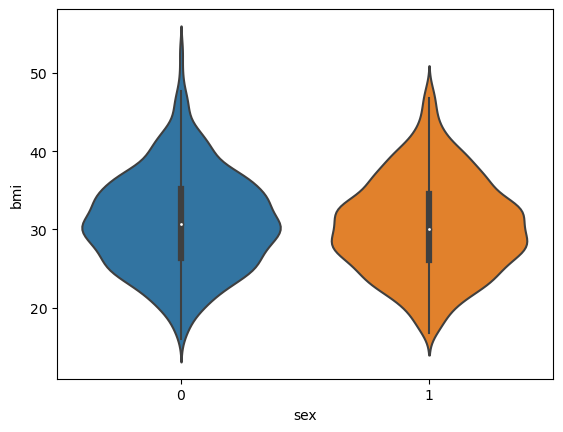

In [42]:
sns.violinplot(x='sex', y='bmi', data=data)

<Axes: xlabel='bmi'>

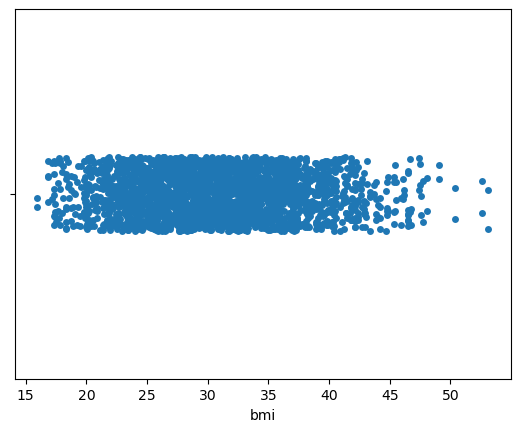

In [43]:
sns.stripplot(x='bmi', data=data)

Text(0.5, 1.0, 'BMI VS Charge')

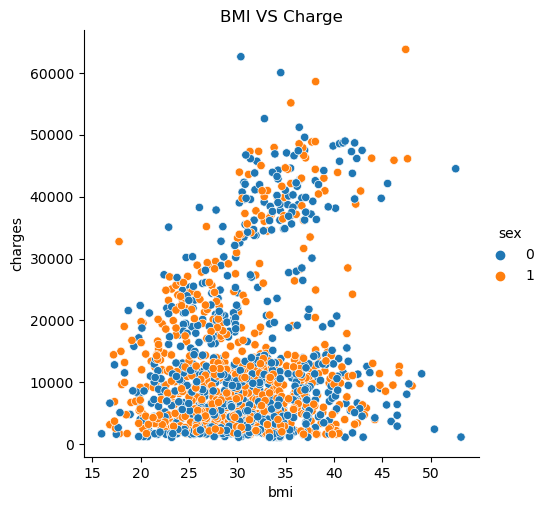

In [44]:
sns.relplot(x='bmi',y='charges',hue='sex',data=data)
plt.title('BMI VS Charge')

<Axes: xlabel='charges', ylabel='Density'>

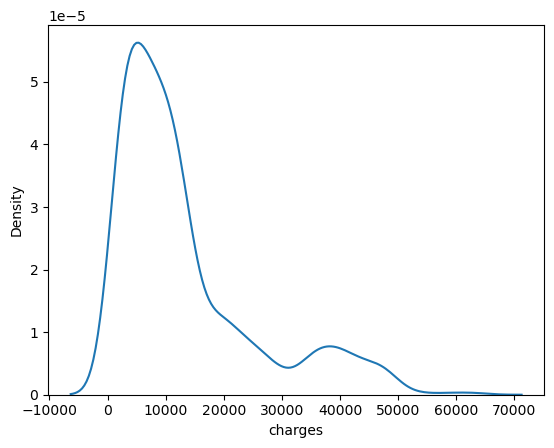

In [45]:
sns.kdeplot(x='charges', data=data)

<Axes: xlabel='region', ylabel='Proportion'>

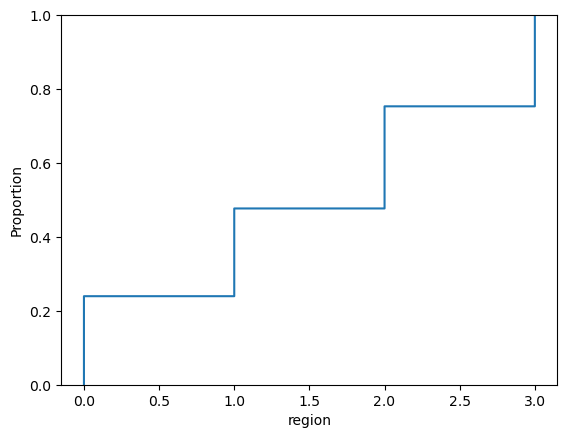

In [46]:
sns.ecdfplot(x='region', data=data)

Text(0.5, 1.0, 'BMI VS Charge')

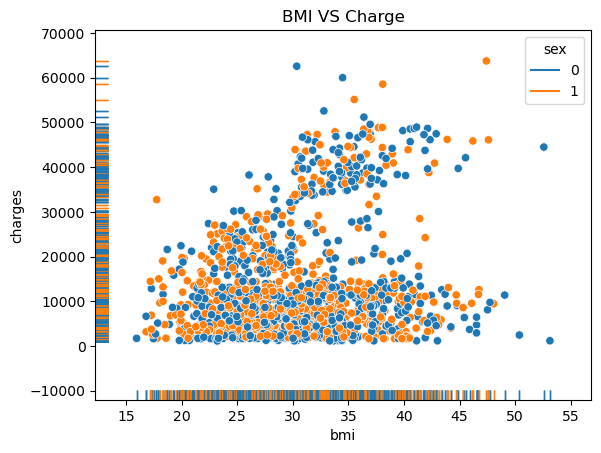

In [47]:
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data)
sns.rugplot(x='bmi',y='charges',hue='sex',data=data)
plt.title('BMI VS Charge')

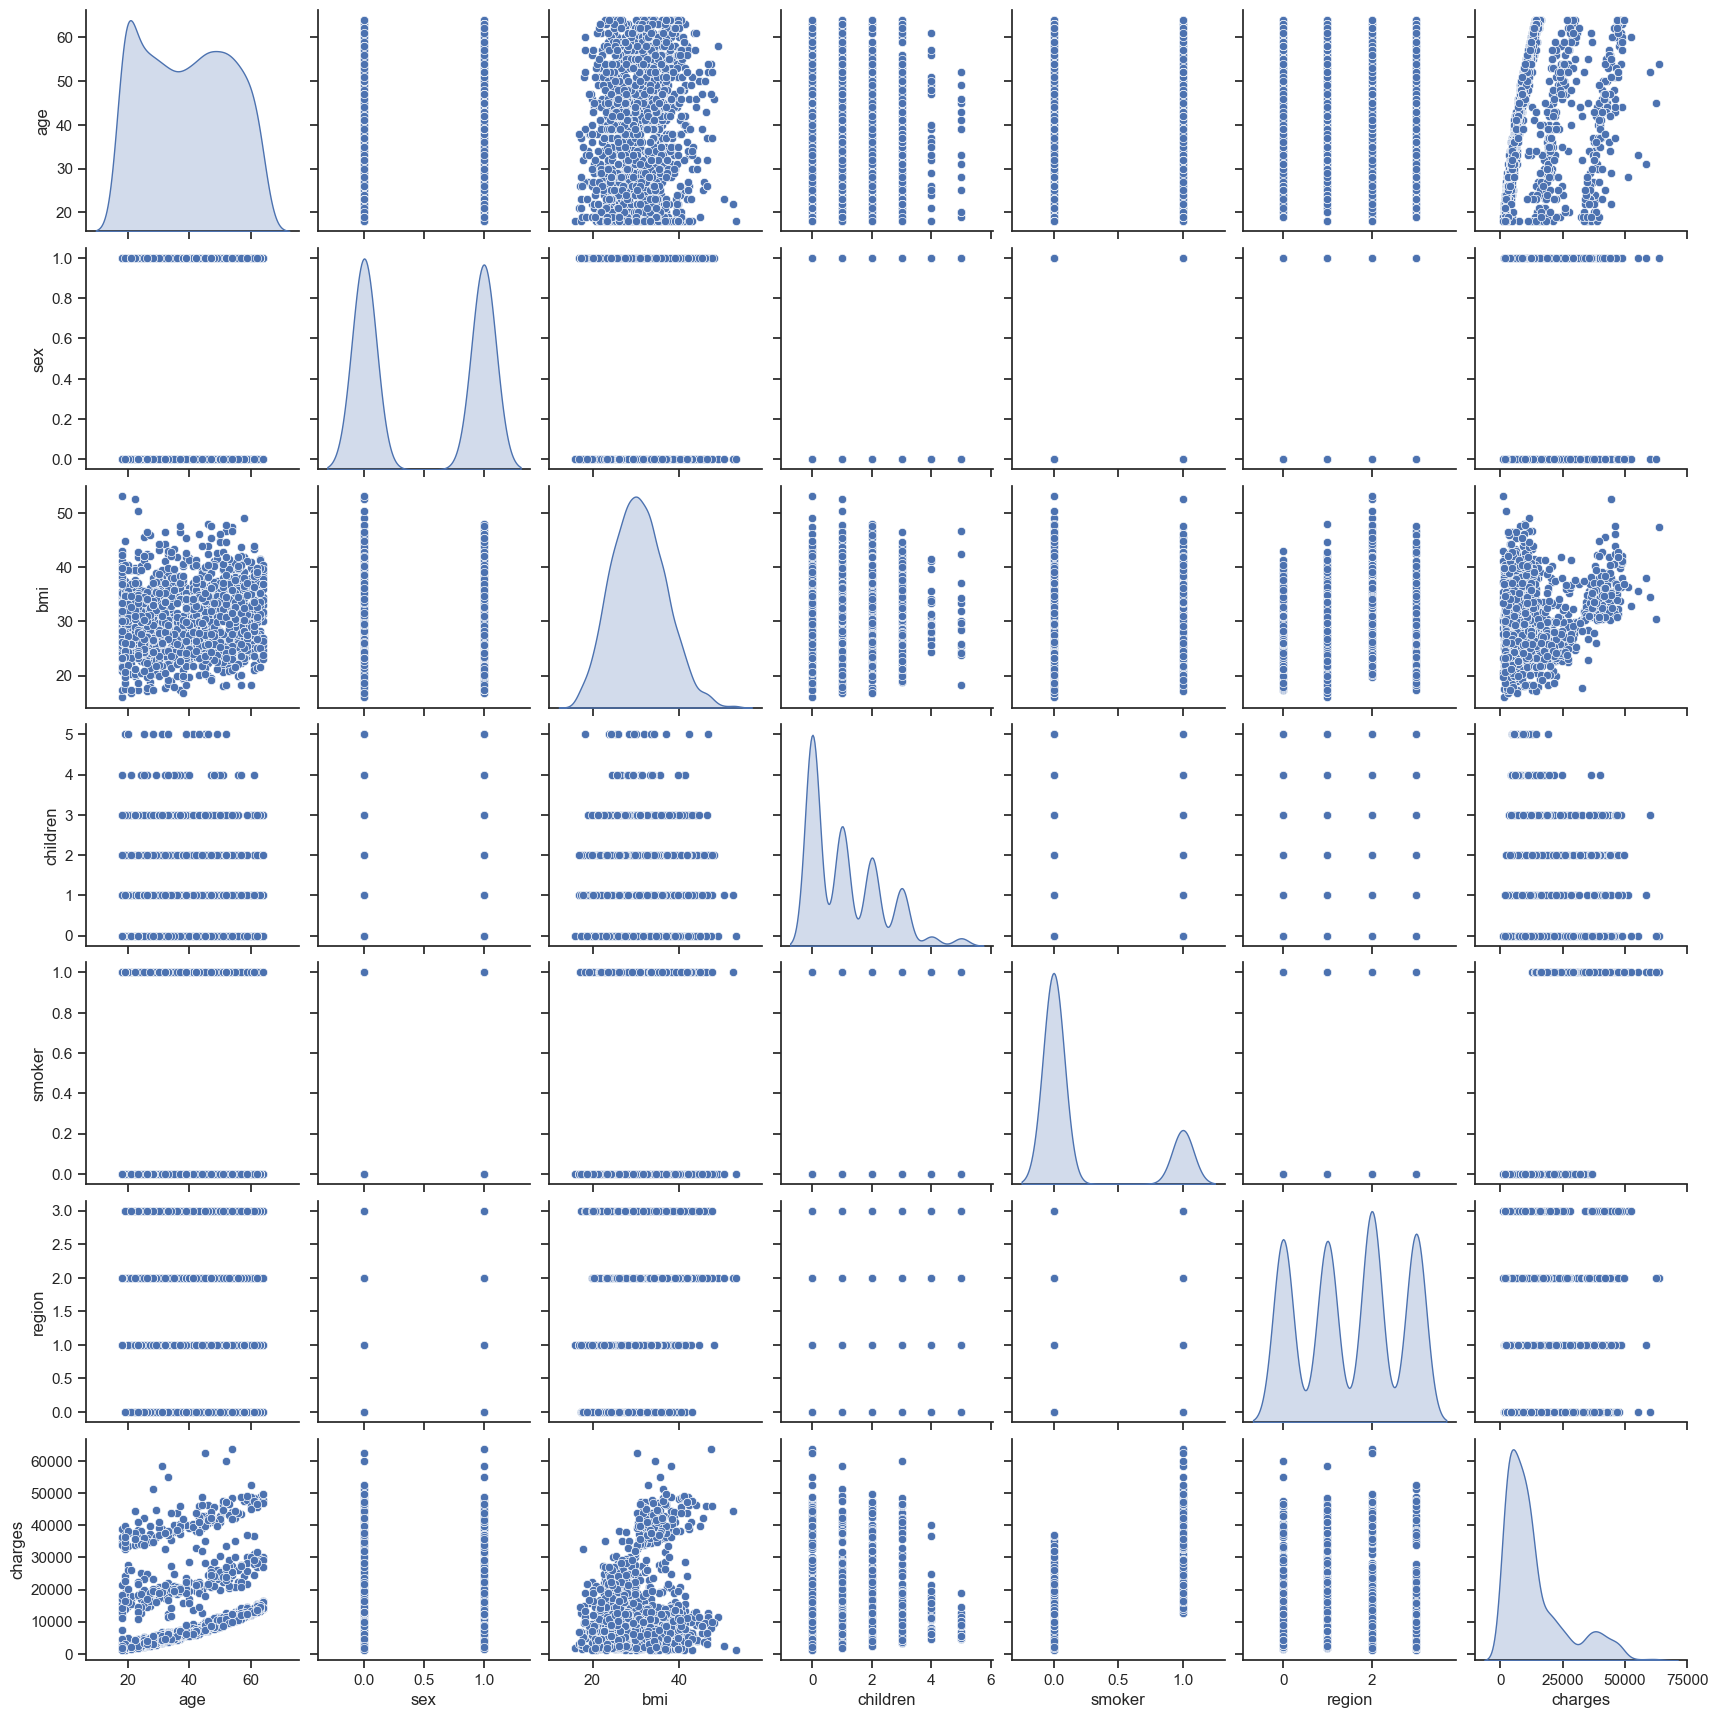

In [48]:
sns.set(style="ticks")
sns.pairplot(data, diag_kind="kde", markers="o")

# Linear Regression

In [52]:
pip install xgboost

                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                             0.0/99.8 MB 163.8 kB/s eta 0:10:09
                                             0.1/99.8 MB 252.2 kB/s eta 0:06:36
                                              0.4/99.8 MB 1.3 MB/s eta 0:01:16
                                              0.5/99.8 MB 1.6 MB/s eta 0:01:02
                                              0.7/99.8 MB 2.1 MB/s eta 0:00:48
                                              1.0/99.8 MB 2.4 MB/s eta 0:00:42
                                              1.2/99.8 MB 2.8 MB/s eta 0:00:35
                                              1.4/99.8 MB 3.0 MB/s eta 0:00:33
                                              1.7/99.8 MB 3.2 MB/s eta 0:00:31

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [54]:
X = data.drop(['charges'], axis=1)
Y = data['charges']  

In [55]:
#Spliting the data into Training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [57]:
X_train.shape

(2217, 6)

In [58]:
X_test.shape

(555, 6)

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
model = LinearRegression()

In [61]:
model.fit(X_train, Y_train)

LinearRegression()

In [63]:
cv_linear_reg = cross_val_score(estimator = model, X = X, y = Y, cv = 10)

y_pred_linear_reg_train = model.predict(X_train)
r2_score_linear_reg_train = r2_score(Y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = model.predict(X_test)
r2_score_linear_reg_test = r2_score(Y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(Y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.748
R2_score (train) : 0.753
R2_score (test) : 0.740
RMSE : 6319.232


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(Y_test, y_pred_linear_reg_test)
mse = mean_squared_error(Y_test, y_pred_linear_reg_test)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred_linear_reg_test)

print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", rmse)
print("R2 Score : ", r2)

Mean Absolute Error :  4167.0311977834235
Mean Squared Error :  39932689.18984327
Root Mean Squared Error :  6319.231693002185
R2 Score :  0.7398199104007912


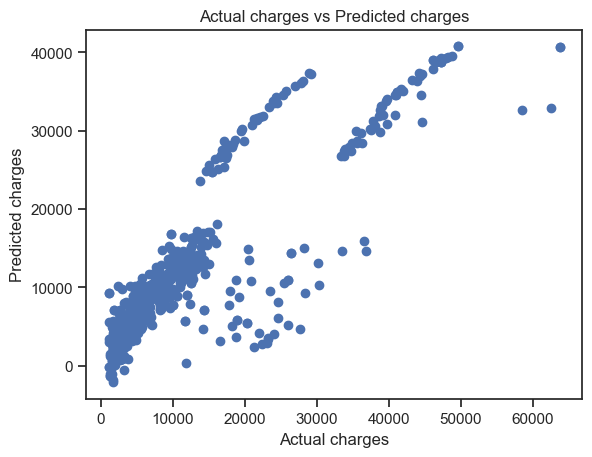

In [66]:
#Visualizing the Result

plt.scatter(Y_test, y_pred_linear_reg_test)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual charges vs Predicted charges")
plt.show()

# Support Vector Machine (Regression)

In [67]:
svr = SVR()

In [68]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train, Y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [69]:
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=100, gamma=0.1, kernel='sigmoid', tol=0.0001)
0.5323913951220536


In [70]:
svr = SVR(C=100, gamma=0.1, kernel='sigmoid', tol=0.0001)
svr.fit(X_train, Y_train)

SVR(C=100, gamma=0.1, kernel='sigmoid', tol=0.0001)

In [72]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(X_train)
r2_score_svr_train = r2_score(Y_train, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test)
r2_score_svr_test = r2_score(Y_test, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(Y_test, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV : 0.532
R2_score (train) : 0.543
R2 score (test) : 0.525
RMSE : 8542.742


In [73]:
mae_svr = mean_absolute_error(Y_test, y_pred_svr_test)
mse_svr = mean_squared_error(Y_test, y_pred_svr_test)
rmse_svr = np.sqrt(mse)
r2_svr = r2_score(Y_test, y_pred_svr_test)

print("Mean Absolute Error : ", mae_svr)
print("Mean Squared Error : ", mse_svr)
print("Root Mean Squared Error : ", rmse_svr)
print("R2 Score : ", r2_svr)

Mean Absolute Error :  4009.6805719878316
Mean Squared Error :  72978434.19314617
Root Mean Squared Error :  6319.231693002185
R2 Score :  0.5245114733717423


# Ridge Regressor

In [74]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

steps = [ ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge())]

ridge_pipe = Pipeline(steps)

In [75]:
parameters = { 'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 'model__random_state' : [42]}
reg_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
reg_ridge = reg_ridge.fit(X_train, Y_train)

In [76]:
reg_ridge.best_estimator_, reg_ridge.best_score_

(Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('model', Ridge(alpha=20, random_state=42))]),
 0.8411478791324823)

In [77]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train, Y_train)

Ridge(alpha=20, random_state=42)

In [78]:
cv_ridge = reg_ridge.best_score_

y_pred_ridge_train = ridge.predict(X_train)
r2_score_ridge_train = r2_score(Y_train, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test)
r2_score_ridge_test = r2_score(Y_test, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(Y_test, y_pred_linear_reg_test)))

print('CV : {0:.3f}'.format(cv_ridge.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_ridge_test))
print('RMSE : {0:.3f}'.format(rmse_ridge))

CV : 0.841
R2 score (train) : 0.753
R2 score (test) : 0.739
RMSE : 6319.232


In [79]:
mae_rid = mean_absolute_error(Y_test, y_pred_ridge_test)
mse_rid = mean_squared_error(Y_test, y_pred_ridge_test)
rmse_rid = np.sqrt(mse)
r2_rid = r2_score(Y_test, y_pred_ridge_test)

print("Mean Absolute Error : ", mae_rid)
print("Mean Squared Error : ", mse_rid)
print("Root Mean Squared Error : ", rmse_rid)
print("R2 Score : ", r2_rid)

Mean Absolute Error :  4179.039890274993
Mean Squared Error :  39990411.94122051
Root Mean Squared Error :  6319.231693002185
R2 Score :  0.7394438197610188


# RandomForest Regressor

In [84]:
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[600,1000,1200],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12]}

In [85]:
reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=10, n_jobs=-1)

In [86]:
reg_rf_gscv = reg_rf_gscv.fit(X_train, Y_train)

KeyboardInterrupt: 

In [ ]:
reg_rf_gscv.best_score_, reg_rf_gscv.best_estimator_

In [ ]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train, Y_train)

In [ ]:
cv_rf = reg_rf_gscv.best_score_

y_pred_rf_train = rf_reg.predict(X_train)
r2_score_rf_train = r2_score(Y_train, y_pred_rf_train)

y_pred_rf_test = rf_reg.predict(X_test)
r2_score_rf_test = r2_score(Y_test, y_pred_rf_test)

rmse_rf = np.sqrt(mean_squared_error(Y_test, y_pred_rf_test))

print('CV : {0:.3f}'.format(cv_rf.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

In [ ]:
mae_rf = mean_absolute_error(Y_test, y_pred_rf_test)
mse_rf = mean_squared_error(Y_test, y_pred_rf_test)
rmse_rf = np.sqrt(mse)
r2_rf = r2_score(Y_test, y_pred_rf_test)

print("Mean Absolute Error : ", mae_rf)
print("Mean Squared Error : ", mse_rf)
print("Root Mean Squared Error : ", rmse_rf)
print("R2 Score : ", r2_rf)

In [87]:
models = [('Linear Regression', rmse_linear, r2_score_linear_reg_train, r2_score_linear_reg_test, cv_linear_reg.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean())
#           ,('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [88]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(train)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(train),R2_Score(test),Cross-Validation
0,Linear Regression,6319.231693,0.752932,0.739820,0.748018
1,Ridge Regression,6319.231693,0.752870,0.739444,0.841148
2,Support Vector Regression,6319.231693,0.542899,0.524511,0.532391


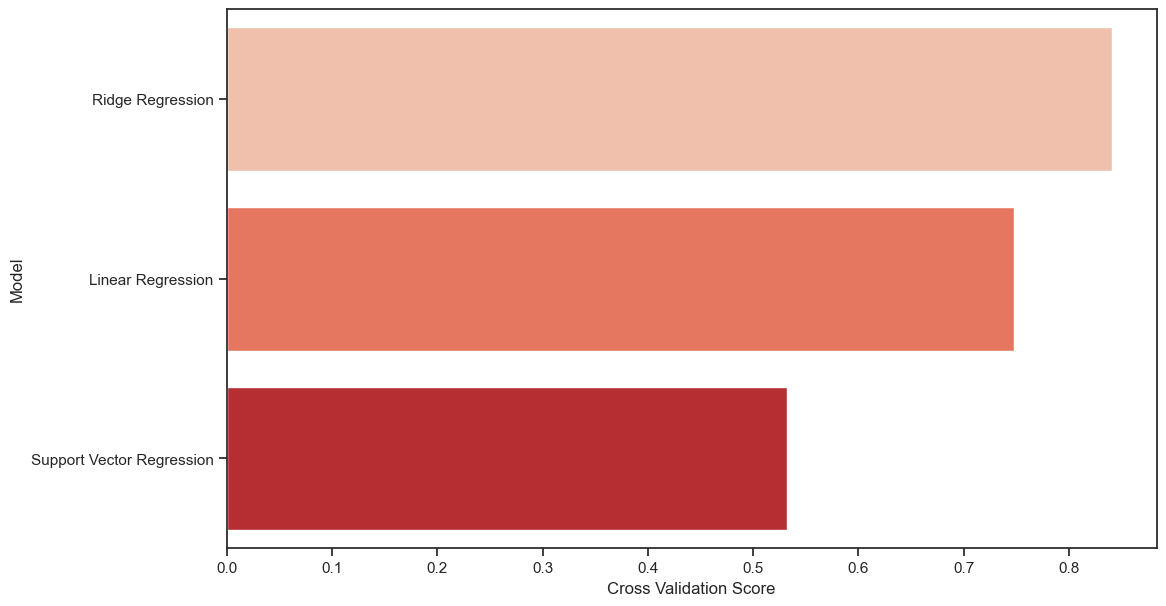

In [89]:
plt.figure(figsize=(12,7))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',data = predict, palette='Reds')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()

In [90]:
import pickle

Pkl_Filename = "rf_tuned.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(ridge, file)